# Modeling and analysis of the Markov process

1. It is required to simulate M realizations of the Markov process defined by the matrix of transition intensities Λ. The process can be in one of three states: {1, 2, 3}. For all implementations of the process, set a time limit t ≤ T.
2. Build implementation trajectories. For a given state, check the fulfillment of the central limit theorem and the law of large numbers.

- https://books.ifmo.ru/file/pdf/471.pdf - A good book on random processes

In [1]:
import statistics
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from scipy import stats
import math

### The uniform distribution generator from Knuth's book

In [7]:
def generate(m, a, c, x_start, number):
    gen_list = []
    x_prev = x_start
    for elt in range(number):
        x_prev = (a*x_prev+c)%m
        gen_list.append(x_prev)
    return gen_list

### Randomly set the initial state for the process

In [5]:
def get_start_cond(i):
  u = generate(16807, 0x7fffffff, 0, 150+i, 1)[0]/16807
  if u <= 1/3: return 0
  if (u <=2/3) and (u>1/3): return 1
  if u > 2/3: return 2

### Generation of the Markov process

- K sets the number of Markov processes
- T sets the the duration of the process

In [24]:
def gen_markov(K,T):
  condition = [[get_start_cond(i)] for i in range(K)]
  time = [[0] for i in range(K)]
  times = [[0] for i in range(K)]

  for k in range(K):
    tau=[]
    t = []
    maxtime = 0
    i=condition[k][0]
    while maxtime<=T:
        for j in range(3):
          q=random.randint(0,100)
          uni = generate(16807, 0x7fffffff, 0, 20+q, 1)[0]/16807
          tau.append((-1/L[i][j])*(math.log(uni)))
          if tau[j]<0:
            tau[j]=10000
        mintau=min(tau)
        t.append(mintau)
        if time[k] == [0]:
          time[k][0] = mintau
          times[k][0] = mintau
          maxtime = mintau
        else:
          time[k].append(time[k][-1]+mintau)
          times[k].append(mintau)
          maxtime = time[k][-1]
        condition[k].append(int(tau.index(mintau)))
        i = int(tau.index(mintau))
        tau=[]
  return time, times, condition

### Defining the transition intensity matrix

In [2]:
L = np.array([[-0.56, 0.16, 0.4],[0.2, -0.25, 0.05],[0.13, 0.1, -0.23]])

In [3]:
P = [L[i]/abs(L[i][i]) for i in range(3)]
for i in range(3):
  P[i][i]=0 
P

[array([0.        , 0.28571429, 0.71428571]),
 array([0.8, 0. , 0.2]),
 array([0.56521739, 0.43478261, 0.        ])]

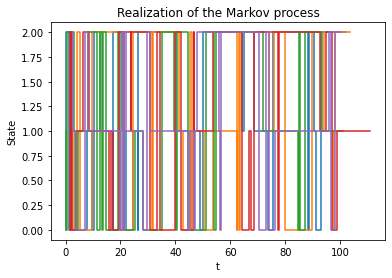

In [25]:
K = 5
T = 100
time_1, _ , condition_1 = gen_markov(K, T)
for i in range(K):
  x = np.array(time_1[i])
  y = np.array(condition_1[i][:-1])
    
  plt.step(x, y)
  plt.xlabel('t');
  plt.ylabel('State');
  plt.title('Realization of the Markov process');
plt.show()

# Checking the law of large numbers(T = 200, K = 3)

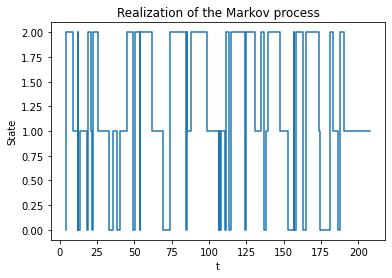

In [30]:
K = 3
T = 200
time_2, times_2 , condition_2 = gen_markov(K, T)
x_0 = np.array(time_2[0])
y_0 = np.array(condition_2[0][:-1])
  
plt.step(x_0, y_0)
plt.xlabel('t');
plt.ylabel('State');
plt.title('Realization of the Markov process');

In [32]:
times_0 = np.array(times_2[0])
time_to_cond = dict(zip(list(times_0), list(y_0)))

cond_0 = [k for k, v in time_to_cond.items() if v == 0]
cond_1 = [k for k, v in time_to_cond.items() if v == 1]
cond_2 = [k for k, v in time_to_cond.items() if v == 2]

p_0 = sum(cond_0)/T
p_1 = sum(cond_1)/T
p_2 = sum(cond_2)/T

print("Empirical probabilities")
p_0, p_1, p_2

Empirical probabilities


(0.18873659830612083, 0.3389836919605094, 0.47374612029697794)

# Checking the central limit theorem (K = 200, T = 100)


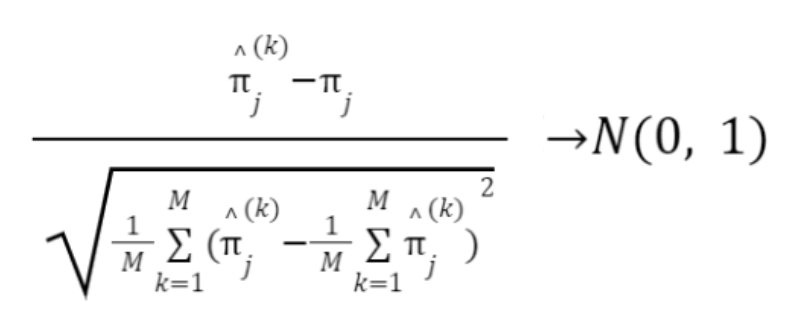

In [34]:
# theoretical probabilities are obtained from system of linear algebraic equations
p_0_teor = 0.2212
p_1_teor = 0.3236
p_2_teor = 0.4551

K = 200
T = 100
time_3, times_3 , condition_3 = gen_markov(K, T)

p_0 = []
p_1 = []
p_2 = []
for k in range(K):
  x_0 = np.array(time_3[k])
  y_0 = np.array(condition_3[k][:-1])
  times_0 = np.array(times_3[k])
  time_to_cond = dict(zip(list(times_0), list(y_0)))
  p_0.append(sum([k for k, v in time_to_cond.items() if v == 0])/T) # summarizing the theoretical probabilities
  p_1.append(sum([k for k, v in time_to_cond.items() if v == 1])/T)
  p_2.append(sum([k for k, v in time_to_cond.items() if v == 2])/T)

In [48]:
dist = np.array(p_0) - p_0_teor
dispersia = math.sqrt(sum((np.array(p_0) - (1/K)*sum(p_0))**2)/K)
Norm_0 = dist/dispersia

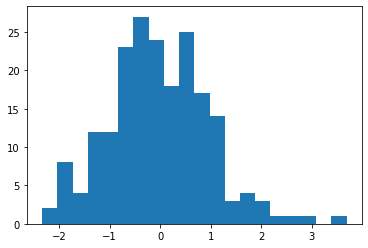

In [51]:
plt.hist(Norm_0, bins = 20);

In [40]:
stats.kstest(Norm_0, 'norm')

KstestResult(statistic=0.05750055781575775, pvalue=0.5045589680699044)

Therefore, we do not reject the hypothesis of the normality of the distribution